Interpolation takes  1.7133557090000124


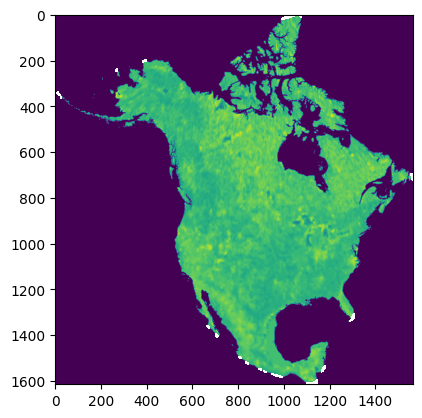

In [8]:
##  Two examples (SLOPE/FMAX) of data filing with nearest neighbor/linear intrepolation
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from time import process_time

Variables = ['SLOPE', 'FMAX']
Variables_nn = ['SLOPE']
Variables_in = ['FMAX']
Methods = ['nearest', 'linear', 'cubic', 'gk']
Points_in_land = "DataConversion_info/05degree_points_in_daymet_land.csv"

demo = 1

# prepare the mgrid with mask
r_surf = nc.Dataset('surfdata.nc', 'r', format='NETCDF4')
source = r_surf.variables[Variables[demo]][:]

# get the fine resolution data and the locations (lat, lon)
r_daymet = nc.Dataset('Daymet_FSDS.nc', 'r', format='NETCDF4')
x_coor = r_daymet.variables['x'][:]  # 1D x-axis
y_coor = r_daymet.variables['y'][:]  # 1D y-axis
FSDS = r_daymet.variables['FSDS'][0,:,:]

mask_d = np.where(~np.isnan(FSDS), 1, 0)
data = np.zeros((len(y_coor),len(x_coor)), dtype='double')
f_data = np.ma.array(data, mask=mask_d)
grid_y, grid_x = np.mgrid[0:f_data.shape[0], 0:f_data.shape[1]]
grid_y1 = grid_y[f_data.mask]
grid_x1 = grid_x[f_data.mask]
f_data1 = f_data[f_data.mask]

# read in the points within daymet land mask
df= pd.read_csv(Points_in_land, header=0)
xy_daymet_land = df.values.tolist()

# prepare the data source with xy_daymet_land points
land_points = len(xy_daymet_land)
points=np.zeros((land_points, 2), dtype='int')
o_data=np.zeros(land_points, dtype='double')
for i in range(land_points):
    # points = [y,x]
    points[i,0] = xy_daymet_land[i][3]
    points[i,1] = xy_daymet_land[i][1]
    # slope is in slope[lat, lon] format  
    o_data[i] = source[int(xy_daymet_land[i][4]),int(xy_daymet_land[i][5])]
points[0:5,:],o_data[0:5]

start = process_time()
f_data1 = griddata(points, o_data, (grid_y1, grid_x1), method=Methods[demo])
end = process_time()

print("Interpolation takes  {}".format(end-start))
# put the masked data back to the data

f_data[f_data.mask]=f_data1
plt.imshow(f_data[::5,::5])

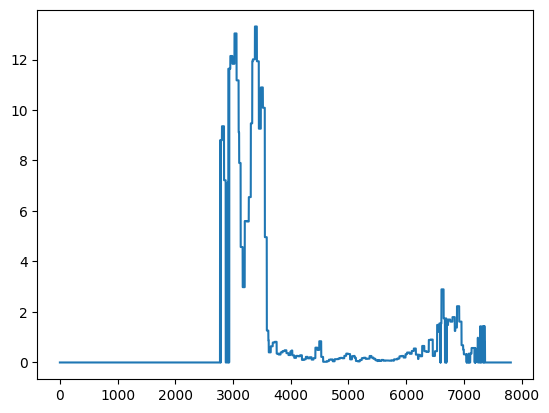

In [27]:
def data_save(number_of_subdomains, grid_id_domains, subdomain_path, i_timesteps, \
              var_name, period, data):
    for i in range(number_of_subdomains):
        # convert local grid_id_lists into an array
        grid_id_arr = np.array(grid_id_domains[i])

        #data_arr = np.array(FSDS_list[i])
        data_arr = np.array(data[i])
        file_name = subdomain_path + 'surface_properities_1kmx1km_daymet_domain'.nc'

        # Open a new NetCDF file to write the data to. For format, you can choose from
        # 'NETCDF3_CLASSIC', 'NETCDF3_64BIT', 'NETCDF4_CLASSIC', and 'NETCDF4'
        w_nc_fid = nc.Dataset(file_name, 'w', format='NETCDF4')
        w_nc_fid.title = 'The ELM domain files on individudal process: '+str(i)

        # create the gridIDs variable
        x_dim = w_nc_fid.createDimension('x_dim', grid_id_arr.size)
        time_dim = w_nc_fid.createDimension('time_dim', i_timesteps)
        w_nc_var = w_nc_fid.createVariable('gridIDs', np.int32, ('x_dim',))
        w_nc_var.long_name = 'gridIds in the subdomain'    
        w_nc_fid.variables['gridIDs'][:] = grid_id_arr.reshape(grid_id_arr.size)

        w_nc_var = w_nc_fid.createVariable(var_name, np.float32, ('time_dim', 'x_dim'))
        w_nc_var.long_name = 'FSDS in the subdomain'    
        w_nc_fid.variables[var_name][:] =data_arr.reshape(i_timesteps,grid_id_arr.size)
        w_nc_fid.close()  # close the new file


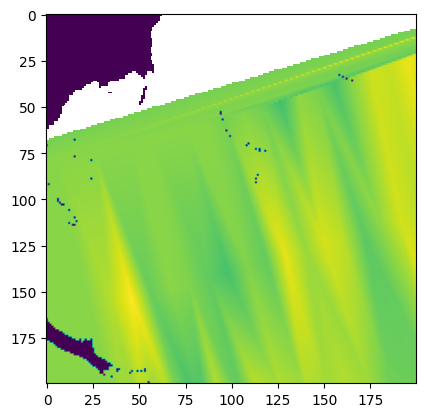

In [9]:
plt.imshow(f_data[50:250,4950:5150])

In [ ]:
points[i,0] = xy_daymet_land[i][3]
points[i,1] = xy_daymet_land[i][1]
# slope is in slope[lat, lon] format
o_data[i] = source[int(xy_daymet_land[i][4]),int(xy_daymet_land[i][5])]

Interpolation takes  2.2834551349999987


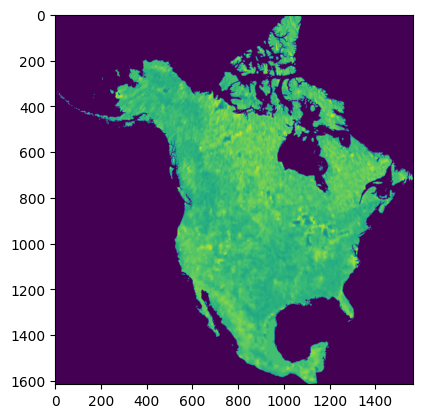

In [1]:
##  Two examples (SLOPE/FMAX) of data filing with nearest neighbor/linear intrepolation
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import process_time
from scipy.interpolate import griddata

Variables = ['SLOPE', 'FMAX']
Variables_nn = ['SLOPE']
Variables_in = ['FMAX']
Methods = ['nearest', 'linear', 'cubic', 'gk']
Points_in_land = "DataConversion_info/original_points_index.csv"

demo = 1

# prepare the mgrid with mask
r_surf = nc.Dataset('surfdata.nc', 'r', format='NETCDF4')
source = r_surf.variables[Variables[demo]][:]

# get the fine resolution data and the locations (lat, lon)
r_daymet = nc.Dataset('Daymet_FSDS.nc', 'r', format='NETCDF4')
x_coor = r_daymet.variables['x'][:]  # 1D x-axis
y_coor = r_daymet.variables['y'][:]  # 1D y-axis
FSDS = r_daymet.variables['FSDS'][0,:,:]

mask_d = np.where(~np.isnan(FSDS), 1, 0)
data = np.zeros((len(y_coor),len(x_coor)), dtype='double')
f_data = np.ma.array(data, mask=mask_d)
grid_x, grid_y = np.meshgrid(x_coor,y_coor)
grid_y1 = grid_y[f_data.mask]
grid_x1 = grid_x[f_data.mask]
f_data1 = f_data[f_data.mask]

# read in the points within daymet land mask
df= pd.read_csv(Points_in_land, header=0)
points_in_daymet_land = df.values.tolist()

# prepare the data source with xy_daymet_land points
land_points = len(points_in_daymet_land)
points=np.zeros((land_points, 2), dtype='double')
o_data=np.zeros(land_points, dtype='double')
for i in range(land_points):
    # points = [y,x]
    points[i,0] = points_in_daymet_land[i][1]
    points[i,1] = points_in_daymet_land[i][0]
    # slope is in slope[lat, lon] format
    o_data[i] = source[int(points_in_daymet_land[i][4]),int(points_in_daymet_land[i][5])]
points[0:5,:],o_data[0:5]

start = process_time()
f_data1 = griddata(points, o_data, (grid_y1, grid_x1), method=Methods[demo])
# put the masked data back to the data
end = process_time()
print("Interpolation takes  {}".format(end-start))

f_data[f_data.mask]=f_data1
plt.imshow(f_data[::5,::5])

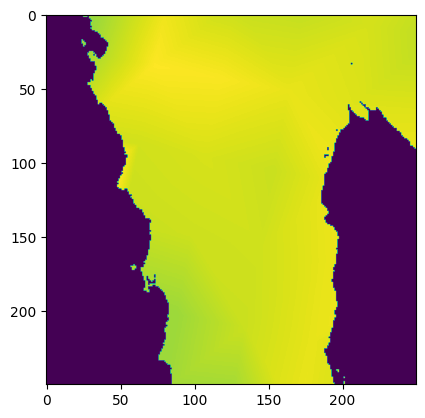

In [7]:
plt.imshow(f_data[5950:6200,3000:3250])

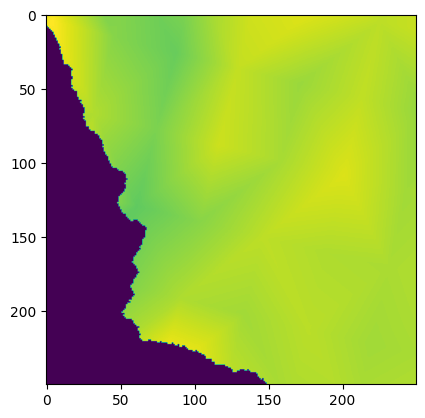

In [11]:
plt.imshow(f_data[5400:5650,2700:2950])

In [55]:
outputfile = 'surface_properities_1kmx1km.nc'
# Open a new NetCDF file to write the data to. For format, you can choose from
# 'NETCDF3_CLASSIC', 'NETCDF3_64BIT', 'NETCDF4_CLASSIC', and 'NETCDF4'
w_nc_fid = nc.Dataset(outputfile, 'w', format='NETCDF4')
w_nc_fid.title = 'The 1kmx1km surface propertties derived from a 0.5 degree global dataset'

# create the dimension variable
x_dim = w_nc_fid.createDimension('x_dim', len(x_coor))
y_dim = w_nc_fid.createDimension('y_dim', len(y_coor))
time_dim = w_nc_fid.createDimension('time_dim', 1)
w_nc_var = w_nc_fid.createVariable(Variables[demo], np.double, ('y_dim','x_dim'))
w_nc_var.long_name = Variables[demo]    
w_nc_fid.variables[Variables[demo]][:] = f_data
w_nc_fid.close()  # close the new file



In [36]:

grid_y, grid_x = np.meshgrid(y_coor,x_coor)

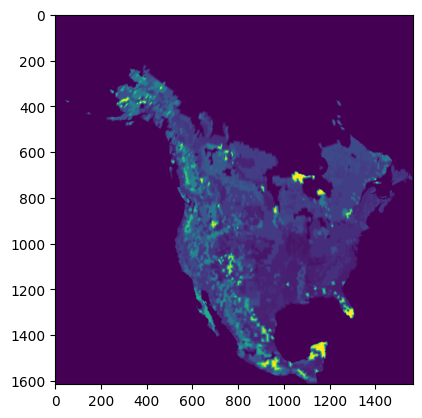

In [18]:
##  Batched data filing with linear intrepolation
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import os
from pathlib import Path

save = 1
m1 = 1

Variables = ['SLOPE', 'FMAX']
Variables_nn = ['SLOPE']
#Variables_in = ['FMAX', 'Ws']

Variables_in = ['FMAX', 'Ws', 'ZWT0', 'binfl', 'gdp', 
                'peatf', 'Ds', 'Dsmax', 'F0', 'LAKEDEPTH',
               'LANDFRAC_PFT','P3', 'PCT_NATVEG', 'PCT_WETLAND', 
                'SECONDARY_P', 'OCCLUDED_P', 'LABILE_P']

'''
"	double Ws(gridcell) "
"	double ZWT0(gridcell) "
"	double binfl(gridcell) "
"	double gdp(gridcell) "
"	double peatf(gridcell) "

"	double Ds(gridcell) "
"	double Dsmax(gridcell) "
"	double F0(gridcell) "
"	double FMAX(gridcell) "
"	double LAKEDEPTH(gridcell) "
"	double P3(gridcell) "
"	double PCT_NATVEG(gridcell) "
"  double PCT_WETLAND(gridcell) ""

"	double SECONDARY_P(gridcell) "
"	double OCCLUDED_P(gridcell) "
"	double LABILE_P(gridcell) "
'''

Methods = ['nearest', 'linear', 'cubic', 'gk']
Points_in_land = "DataConversion_info/original_points_index.csv"
outputfile = 'surface_properities_1kmx1km.nc'

if Path(outputfile).exists():
    os.remove("surface_properities_1kmx1km.nc")
if save:
    # Open a new NetCDF file to write the data to. For format, you can choose from
    # 'NETCDF3_CLASSIC', 'NETCDF3_64BIT', 'NETCDF4_CLASSIC', and 'NETCDF4'
    w_nc_fid = nc.Dataset(outputfile, 'w', format='NETCDF4')
    w_nc_fid.title = 'The 1kmx1km surface propertties derived from a 0.5 degree global dataset'


# get the fine resolution data and the locations (lat, lon)
r_daymet = nc.Dataset('Daymet_FSDS.nc', 'r', format='NETCDF4')
x_coor = r_daymet.variables['x'][:]  # 1D x-axis
y_coor = r_daymet.variables['y'][:]  # 1D y-axis
FSDS = r_daymet.variables['FSDS'][0,:,:]

mask_d = np.where(~np.isnan(FSDS), 1, 0)
data = np.zeros((len(y_coor),len(x_coor)), dtype='double')
f_data = np.ma.array(data, mask=mask_d)
grid_x, grid_y = np.meshgrid(x_coor,y_coor)
grid_y1 = grid_y[f_data.mask]
grid_x1 = grid_x[f_data.mask]
f_data1 = f_data[f_data.mask]

if save:
    # create the dimension variable
    x_dim = w_nc_fid.createDimension('x_dim', len(x_coor))
    y_dim = w_nc_fid.createDimension('y_dim', len(y_coor))
    time_dim = w_nc_fid.createDimension('time_dim', 1)

# read in the points within daymet land mask
df= pd.read_csv(Points_in_land, header=0)
points_in_daymet_land = df.values.tolist()

# prepare the data source with points_in_daymet_land

land_points = len(points_in_daymet_land)
points=np.zeros((land_points, 2), dtype='double')
o_data=np.zeros(land_points, dtype='double')
for i in range(land_points):
    # points = [y,x]
    points[i,0] = points_in_daymet_land[i][1]
    points[i,1] = points_in_daymet_land[i][0]

# read in the source data
r_surf = nc.Dataset('surfdata.nc', 'r', format='NETCDF4')

for v in range(len(Variables_in)):
    source = r_surf.variables[Variables_in[v]][:]

    for i in range(land_points):
        # source is in [lat, lon] format
        o_data[i] = source[int(points_in_daymet_land[i][4]),int(points_in_daymet_land[i][5])]
    points[0:5,:],o_data[0:5]

    f_data1 = griddata(points, o_data, (grid_y1, grid_x1), method=Methods[m1])
    # put the masked data back to the data (with the daymet land mask)
    f_data = np.ma.array(data, mask=mask_d)
    f_data[f_data.mask]=f_data1

    if save:
        w_nc_var = w_nc_fid.createVariable(Variables_in[v], np.double, ('y_dim','x_dim'))
        w_nc_var.long_name = Variables_in[v]    
        w_nc_fid.variables[Variables_in[v]][:] = f_data

if save:
    w_nc_fid.close()  # close the new file

plt.imshow(f_data[::5,::5])

In [19]:
points[0:5,:],o_data[0:5]

(array([[-3078585.22940755, -4534093.90085944],
        [-3021123.49036372, -4507001.84023084],
        [-3047967.38751522, -4449621.24076392],
        [-3074466.85468766, -4392080.76588719],
        [-2936920.72460531, -4536919.95959292]]),
 array([0., 0., 0., 0., 0.]))

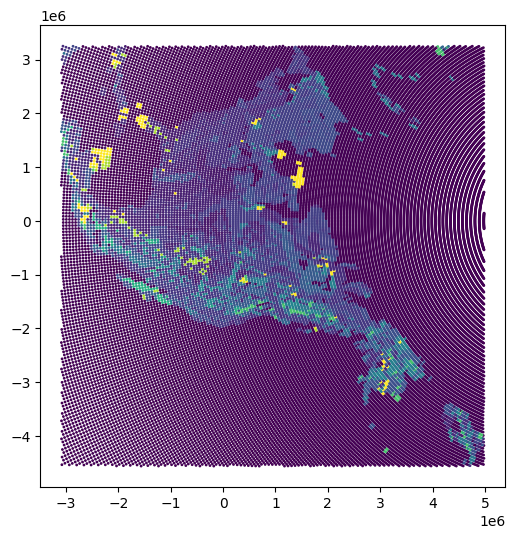

In [32]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(points[:,0],points[:,1],s=1,c=o_data, marker = 'o' );

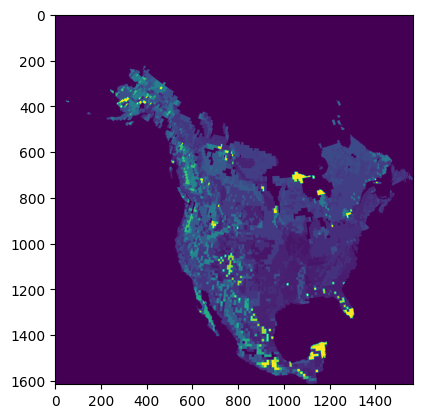

In [45]:
##  Batched data filing with nearest neighbor and linear interpolation
##  (non-urban, single layer (gridcell) variables)
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import os
from pathlib import Path

save = 1

# nearest neighbor:"double" variables
Variable_nn_double = ['SLOPE', 'TOPO', 'PCT_GLACIER', 'PCT_LAKE', 'STD_ELEV']

# nearest neighbor:"int" variables
Variable_nn_int = ['PFTDATA_MASK','SOIL_COLOR', 'SOIL_ORDER', 'abm']

# linear intrepolation of "double" variables
Variable_in_double = ['FMAX', 'Ws', 'ZWT0', 'binfl', 'gdp', 
                'peatf', 'Ds', 'Dsmax', 'F0', 'LAKEDEPTH',
               'LANDFRAC_PFT','P3', 'PCT_NATVEG', 'PCT_WETLAND', 
                'SECONDARY_P', 'OCCLUDED_P', 'LABILE_P']

Variable_type = ['double', 'int32']
Method_list = ['nearest', 'linear', 'cubic', 'gk']
Dimension_list = ['gridcell', 'nlevsoi', 'natpft',
                  'numburbl', 'ulevurb', 'numrad' ]

'''
====== linear =====
double     Ws(gridcell) "
double   ZWT0(gridcell) "
double  binfl(gridcell) "
double    gdp(gridcell) "
double  peatf(gridcell) "

double          Ds(gridcell) "
double       Dsmax(gridcell) "
double          F0(gridcell) "
double        FMAX(gridcell) "
double   LAKEDEPTH(gridcell) "
double          P3(gridcell) "
double  PCT_NATVEG(gridcell) "
double PCT_WETLAND(gridcell) ""

double SECONDARY_P(gridcell) "
double  OCCLUDED_P(gridcell) "
double    LABILE_P(gridcell) "

======nearest neighbor======
double PCT_GLACIER(gridcell) 
double    PCT_LAKE(gridcell) 
double    STD_ELEV(gridcell) 
double       SLOPE(gridcell)
double        TOPO(gridcell) 

int PFTDATA_MASK(gridcell) 
int  SOIL_COLOR(gridcell) 
int  SOIL_ORDER(gridcell) 
int         abm(gridcell) 

**** urban variables
int    URBAN_REGION_ID(gridcell)

int       NLEV_IMPROAD(numurbl, gridcell) 

double  T_BUILDING_MAX(numurbl, gridcell) "
double  T_BUILDING_MIN(numurbl, gridcell) "
double WIND_HGT_CANYON(numurbl, gridcell) 
double    WTLUNIT_ROOF(numurbl, gridcell) "
double     WTROAD_PERV(numurbl, gridcell) "
double      THICK_ROOF(numurbl, gridcell) "
double      THICK_WALL(numurbl, gridcell) "
double       PCT_URBAN(numurbl, gridcell) 
double         HT_ROOF(numurbl, gridcell) 
double      EM_IMPROAD(numurbl, gridcell) "
double      EM_PERROAD(numurbl, gridcell) "
double         EM_ROOF(numurbl, gridcell) "
double         EM_WALL(numurbl, gridcell) "
double      CANYON_HWR(numurbl, gridcell)

double      TK_IMPROAD(nlevurb, numurbl, gridcell) "
double         TK_ROOF(nlevurb, numurbl, gridcell) "
double         TK_WALL(nlevurb, numurbl, gridcell) "
double      CV_IMPROAD(nlevurb, numurbl, gridcell) "
double         CV_ROOF(nlevurb, numurbl, gridcell) "
double         CV_WALL(nlevurb, numurbl, gridcell) "

double ALB_IMPROAD_DIF(numrad, numurbl, gridcell) 
double ALB_IMPROAD_DIR(numrad, numurbl, gridcell) "
double ALB_PERROAD_DIF(numrad, numurbl, gridcell) "
double ALB_PERROAD_DIR(numrad, numurbl, gridcell) "
double    ALB_ROOF_DIF(numrad, numurbl, gridcell) "
double    ALB_ROOF_DIR(numrad, numurbl, gridcell) "
double    ALB_WALL_DIF(numrad, numurbl, gridcell) "
double    ALB_WALL_DIR(numrad, numurbl, gridcell) "
'''
# double variable with nearest neighbor method
#iMethod = Method_list[0]  # 0 nearest
#iVariable_list = Variable_nn_double
#iVariable_type = Variable_type[0] # 0: Double, 1: int32

# int variable with nearest neighbor method
#iMethod = Method_list[0]  # 0 nearest
#iVariable_list = Variable_nn_int
#iVariable_type = Variable_type[1] # 0: Double, 1: int32

# double variable with linear interpolation method
iMethod = Method_list[1]  # 0 linear
iVariable_list = Variable_in_double
iVariable_type = Variable_type[0] # 0: Double, 1: int32

Points_in_land = "DataConversion_info/original_points_index.csv"
outputfile = 'surface_properities_1kmx1km_'+iVariable_type+'_'+iMethod+'.nc'

if Path(outputfile).exists():
    os.remove(outputfile)
if save:
    # Open a new NetCDF file to write the data to. For format, you can choose from
    # 'NETCDF3_CLASSIC', 'NETCDF3_64BIT', 'NETCDF4_CLASSIC', and 'NETCDF4'
    w_nc_fid = nc.Dataset(outputfile, 'w', format='NETCDF4')
    w_nc_fid.title = 'The 1kmx1km surface propertties derived from a 0.5 degree global dataset'


# get the fine resolution data and the locations (lat, lon)
r_daymet = nc.Dataset('Daymet_FSDS.nc', 'r', format='NETCDF4')
x_coor = r_daymet.variables['x'][:]  # 1D x-axis
y_coor = r_daymet.variables['y'][:]  # 1D y-axis
FSDS = r_daymet.variables['FSDS'][0,:,:]

mask_d = np.where(~np.isnan(FSDS), 1, 0)
data = np.zeros((len(y_coor),len(x_coor)), dtype='double')
f_data = np.ma.array(data, mask=mask_d)
grid_x, grid_y = np.meshgrid(x_coor,y_coor)
grid_y1 = grid_y[f_data.mask]
grid_x1 = grid_x[f_data.mask]
f_data1 = f_data[f_data.mask]

if save:
    # create the dimension variable
    x_dim = w_nc_fid.createDimension('x_dim', len(x_coor))
    y_dim = w_nc_fid.createDimension('y_dim', len(y_coor))
    time_dim = w_nc_fid.createDimension('time_dim', 1)

# read in the points within daymet land mask
df= pd.read_csv(Points_in_land, header=0)
points_in_daymet_land = df.values.tolist()

# prepare the data source with points_in_daymet_land

land_points = len(points_in_daymet_land)
points=np.zeros((land_points, 2), dtype='double')
o_data=np.zeros(land_points, dtype='double')
for i in range(land_points):
    # points = [y,x]
    points[i,0] = points_in_daymet_land[i][1]
    points[i,1] = points_in_daymet_land[i][0]

# read in the source data
r_surf = nc.Dataset('surfdata.nc', 'r', format='NETCDF4')

for v in range(len(iVariable_list)):
    source = r_surf.variables[iVariable_list[v]][:]

    for i in range(land_points):
        # source is in [lat, lon] format
        o_data[i] = source[int(points_in_daymet_land[i][4]),int(points_in_daymet_land[i][5])]
    points[0:5,:],o_data[0:5]

    f_data1 = griddata(points, o_data, (grid_y1, grid_x1), method=iMethods)
    # put the masked data back to the data (with the daymet land mask)
    f_data = np.ma.array(data, mask=mask_d)
    f_data[f_data.mask]=f_data1

    if save:
        w_nc_var = w_nc_fid.createVariable(iVariable_list[v], iVariable_type, ('y_dim','x_dim'))
        w_nc_var.long_name = iVariable_list[v]    
        w_nc_fid.variables[iVariable_list[v]][:] = f_data

if save:
    w_nc_fid.close()  # close the new file

plt.imshow(f_data[::5,::5])

In [39]:
Variable_type = ['double', 'int32']
Method_list = ['nearest', 'linear', 'cubic', 'gk']
iMethod = Method_list[0]
iVariable_type = Variable_type[0]
Variables_nn_int = ['PFTDATA_MASK','SOIL_COLOR', 'SOIL_ORDER', 'abm']
iVariable_list = Variables_nn_int
outputfile = 'surface_properities_1kmx1km_'+iVariable_type+'_'+iMethods+'.nc'
print('varaible name is '+ outputfile)

varaible name is surface_properities_1kmx1km.ncdouble_nearest


In [24]:
##  Batched data filing with nearest neighbor interpolation
##  (urban, multiple-layer (gridcell) variables)
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import os
from pathlib import Path

save = 1
list = 5

numurbl = 3 ;
nlevurb = 5 ;
numrad = 2 ;
nlevsoi = 10 ;

time = 12
nchar = 256 ;
lsmpft = 17 ;
natpft = 17 ;




# nearest neighbor:"int" variables (gridcell)
Variable_urban_int_1D = ['URBAN_REGION_ID']

# nearest neighbor:"int" variables (numurbl, gridcell)
Variable_urban_int_2D = ['NLEV_IMPROAD' ]

# nearest neighbor:"double" variables (numurbl, gridcell)
Variable_urban_double_2D = ['T_BUILDING_MAX', 'T_BUILDING_MIN',
        'WIND_HGT_CANYON','WTLUNIT_ROOF','WTROAD_PERV','THICK_ROOF',
        'THICK_WALL','PCT_URBAN','HT_ROOF','EM_IMPROAD','EM_PERROAD',
        'EM_ROOF','EM_WALL','CANYON_HWR']

# nearest neighbor:"double" variables (nlevurb, numurbl, gridcell)
Variable_urban_double_3D_nlev = ['TK_IMPROAD','TK_ROOF','TK_WALL', 
                                 'CV_IMPROAD', 'CV_ROOF', 'CV_WALL']

# nearest neighbor:"double" variables (numrad, numurbl, gridcell)
Variable_urban_double_3D_nrad = ['ALB_IMPROAD_DIF','ALB_IMPROAD_DIR','ALB_PERROAD_DIF',
        'ALB_PERROAD_DIR','ALB_ROOF_DIF', 'ALB_ROOF_DIR',
        'ALB_WALL_DIF', 'ALB_WALL_DIR']

Variable_type = ['double', 'int32']
Method_list = ['nearest', 'linear', 'cubic', 'gk']
Dimension_list = ['gridcell', 'nlevsoi', 'natpft',
                  'numburbl', 'ulevurb', 'numrad' ]

'''
===== multiple layers variable (non-urban, nearest neighbor) ====
double     ORGANIC(nlevsoi, gridcell)
double    PCT_CLAY(nlevsoi, gridcell)
double    PCT_SAND(nlevsoi, gridcell)

double PCT_NAT_PFT(natpft, gridcell) 


====== urban variables (nearest neighbor) ====

int    URBAN_REGION_ID(gridcell)

int       NLEV_IMPROAD(numurbl, gridcell) 

double  T_BUILDING_MAX(numurbl, gridcell) "
double  T_BUILDING_MIN(numurbl, gridcell) "
double WIND_HGT_CANYON(numurbl, gridcell) 
double    WTLUNIT_ROOF(numurbl, gridcell) "
double     WTROAD_PERV(numurbl, gridcell) "
double      THICK_ROOF(numurbl, gridcell) "
double      THICK_WALL(numurbl, gridcell) "
double       PCT_URBAN(numurbl, gridcell) 
double         HT_ROOF(numurbl, gridcell) 
double      EM_IMPROAD(numurbl, gridcell) "
double      EM_PERROAD(numurbl, gridcell) "
double         EM_ROOF(numurbl, gridcell) "
double         EM_WALL(numurbl, gridcell) "
double      CANYON_HWR(numurbl, gridcell)

double      TK_IMPROAD(nlevurb, numurbl, gridcell) "
double         TK_ROOF(nlevurb, numurbl, gridcell) "
double         TK_WALL(nlevurb, numurbl, gridcell) "
double      CV_IMPROAD(nlevurb, numurbl, gridcell) "
double         CV_ROOF(nlevurb, numurbl, gridcell) "
double         CV_WALL(nlevurb, numurbl, gridcell) "

double ALB_IMPROAD_DIF(numrad, numurbl, gridcell) 
double ALB_IMPROAD_DIR(numrad, numurbl, gridcell) "
double ALB_PERROAD_DIF(numrad, numurbl, gridcell) "
double ALB_PERROAD_DIR(numrad, numurbl, gridcell) "
double    ALB_ROOF_DIF(numrad, numurbl, gridcell) "
double    ALB_ROOF_DIR(numrad, numurbl, gridcell) "
double    ALB_WALL_DIF(numrad, numurbl, gridcell) "
double    ALB_WALL_DIR(numrad, numurbl, gridcell) "
'''

iMethod = Method_list[0]  # 0 nearest
# int variable with nearest neighbor method
if list==1: 
    tag = "int_y_x"
    iVariable_list = Variable_urban_int_1D 
    iVariable_type = Variable_type[1] # 0: Double, 1: int32

# int variable with nearest neighbor method (numurbl, gridcell))
if list == 2:
    tag = "int_numurbl_y_x"
    iVariable_list = Variable_urban_int_2D
    iVariable_type = Variable_type[1] # 0: Double, 1: int32
    
if list == 3:
    tag = "double_numurbl_y_x"
    iVariable_list = Variable_urban_double_2D
    iVariable_type = Variable_type[0] # 0: Double, 1: int32

if list == 4:
    tag = "double_nlevurb_numurbl_y_x"
    iVariable_list = Variable_urban_double_3D_nlev
    iVariable_type = Variable_type[0] # 0: Double, 1: int32
    
if list == 5:
    tag = "double_numrad_numurbl_y_x"
    iVariable_list = Variable_urban_double_3D_nrad
    iVariable_type = Variable_type[0] # 0: Double, 1: int32    
    
Points_in_land = "DataConversion_info/original_points_index.csv"
outputfile = 'surface_properities_1kmx1km_urban_'+tag+'.nc'

if Path(outputfile).exists():
    os.remove(outputfile)
if save:
    # Open a new NetCDF file to write the data to. For format, you can choose from
    # 'NETCDF3_CLASSIC', 'NETCDF3_64BIT', 'NETCDF4_CLASSIC', and 'NETCDF4'
    w_nc_fid = nc.Dataset(outputfile, 'w', format='NETCDF4')
    w_nc_fid.title = 'The 1kmx1km surface propertties derived from a 0.5 degree global dataset'

    # create the dimension variable
    x_dim = w_nc_fid.createDimension('x_dim', len(x_coor))
    y_dim = w_nc_fid.createDimension('y_dim', len(y_coor))
    urb_dim = w_nc_fid.createDimension('numurbl', numurbl)
    nlurb_dim = w_nc_fid.createDimension('nlevurb', nlevurb)
    nrad_dim = w_nc_fid.createDimension('numrad', numrad)
    time_dim = w_nc_fid.createDimension('time_dim', None)

# get the fine resolution data and the locations (lat, lon)
r_daymet = nc.Dataset('Daymet_FSDS.nc', 'r', format='NETCDF4')
x_coor = r_daymet.variables['x'][:]  # 1D x-axis
y_coor = r_daymet.variables['y'][:]  # 1D y-axis
FSDS = r_daymet.variables['FSDS'][0,:,:]

mask_d = np.where(~np.isnan(FSDS), 1, 0)
data = np.zeros((len(y_coor),len(x_coor)), dtype=iVariable_type)
f_data = np.ma.array(data, mask=mask_d)
grid_x, grid_y = np.meshgrid(x_coor,y_coor)
grid_y1 = grid_y[f_data.mask]
grid_x1 = grid_x[f_data.mask]
f_data1 = f_data[f_data.mask]

print("single layer grid is ready")

# read in the points within daymet land mask
df= pd.read_csv(Points_in_land, header=0)
points_in_daymet_land = df.values.tolist()

# prepare the data source with points_in_daymet_land

land_points = len(points_in_daymet_land)
points=np.zeros((land_points, 2), dtype='double')
o_data=np.zeros(land_points, dtype='double')
for i in range(land_points):
    # points = [y,x]
    points[i,0] = points_in_daymet_land[i][1]
    points[i,1] = points_in_daymet_land[i][0]

print ('location of data points is ready')

# read in the source data
r_surf = nc.Dataset('surfdata.nc', 'r', format='NETCDF4')

for v in range(len(iVariable_list)):
    source = r_surf.variables[iVariable_list[v]][:]
    
    if (len(source.shape) == 2):
        layer = 1
        out_layer = 1
        all_data = np.zeros((len(y_coor),len(x_coor)), dtype=iVariable_type)

    if (len(source.shape) == 3):
        layer = source.shape[0]  #(3, 360, 720)
        out_layer = 1
        all_data = np.zeros((layer, len(y_coor),len(x_coor)), dtype=iVariable_type)

    if (len(source.shape) == 4):
        layer = source.shape[1]  #(5, 3, 360, 720)
        out_layer = source.shape[0]      
        all_data = np.zeros((out_layer, layer, len(y_coor),len(x_coor)), dtype=iVariable_type)

    for ol in range(out_layer):    
        for l in range(layer):  
            for i in range(land_points):
                # source is in [lat, lon] format
                if (len(source.shape) == 2):
                    o_data[i] = source[int(points_in_daymet_land[i][4]),int(points_in_daymet_land[i][5])]
                if (len(source.shape) == 3):                
                    o_data[i] = source[l, int(points_in_daymet_land[i][4]),int(points_in_daymet_land[i][5])]
                if (len(source.shape) == 4):  
                    o_data[i] = source[ol, l, int(points_in_daymet_land[i][4]),int(points_in_daymet_land[i][5])]
                    
            f_data1 = griddata(points, o_data, (grid_y1, grid_x1), method=iMethod)
            # put the masked data back to the data (with the daymet land mask)
            f_data = np.ma.array(data, mask=mask_d)
            f_data[f_data.mask]=f_data1
            
            if (len(source.shape) == 2):
                all_data = f_data
            if (len(source.shape) == 3):
                all_data[l,:,:] = f_data
            if (len(source.shape) == 4):
                all_data[ol, l,:,:] = f_data                
            print(str(l) + " layer is ready")
            
    if save:
        
        if list==1:
            w_nc_var = w_nc_fid.createVariable(iVariable_list[v], iVariable_type, 
                                   ('y_dim', 'x_dim'))       
        if (list==2 or list == 3):  
            w_nc_var = w_nc_fid.createVariable(iVariable_list[v], iVariable_type, 
                                   ('numurbl', 'y_dim', 'x_dim'))       
        if list==4:
            w_nc_var = w_nc_fid.createVariable(iVariable_list[v], iVariable_type, 
                                   ('nlevurb', 'numurbl', 'y_dim', 'x_dim'))   
        if list==5:
            w_nc_var = w_nc_fid.createVariable(iVariable_list[v], iVariable_type, 
                                   ('numrad', 'numurbl', 'y_dim', 'x_dim'))   
              
        w_nc_var.long_name = iVariable_list[v]    
        w_nc_fid.variables[iVariable_list[v]][:] = all_data
        print(" Variable: "+ iVariable_list[v] + " is done")

if save:
    w_nc_fid.close()  # close the new file

#plt.imshow(all_data[0,::5,::5])

single layer grid is ready
location of data points is ready
0 layer is ready
1 layer is ready
2 layer is ready
0 layer is ready
1 layer is ready
2 layer is ready
 Variable: ALB_IMPROAD_DIF is done
0 layer is ready
1 layer is ready
2 layer is ready
0 layer is ready
1 layer is ready
2 layer is ready
 Variable: ALB_IMPROAD_DIR is done
0 layer is ready
1 layer is ready
2 layer is ready
0 layer is ready
1 layer is ready
2 layer is ready
 Variable: ALB_PERROAD_DIF is done
0 layer is ready
1 layer is ready
2 layer is ready
0 layer is ready
1 layer is ready
2 layer is ready
 Variable: ALB_PERROAD_DIR is done
0 layer is ready
1 layer is ready
2 layer is ready
0 layer is ready
1 layer is ready
2 layer is ready
 Variable: ALB_ROOF_DIF is done
0 layer is ready
1 layer is ready
2 layer is ready
0 layer is ready
1 layer is ready
2 layer is ready
 Variable: ALB_ROOF_DIR is done
0 layer is ready
1 layer is ready
2 layer is ready
0 layer is ready
1 layer is ready
2 layer is ready
 Variable: ALB_WALL_DI

In [23]:
all_data.shape


(2, 3, 8075, 7814)

In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import os
from pathlib import Path

r_surf = nc.Dataset('surfdata.nc', 'r', format='NETCDF4')
source = r_surf.variables['NLEV_IMPROAD'][:]

In [12]:
for i in range(land_points):
    # source is in [lat, lon] format
    o_data[i] = source[l, int(points_in_daymet_land[i][4]),int(points_in_daymet_land[i][5])]
points[0:5,:],o_data[0:5]

f_data1 = griddata(points, o_data, (grid_y1, grid_x1), method=iMethod)
    # put the masked data back to the data (with the daymet land mask)
f_data = np.ma.array(data, mask=mask_d)
f_data[f_data.mask]=f_data1
all_data[l,:,:] = f_data

In [9]:
print(w_nc_fid)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: The 1kmx1km surface propertties derived from a 0.5 degree global dataset
    dimensions(sizes): x_dim(7814), y_dim(8075), numurbl(3), nlevurb(5), numrad(5), time_dim(0)
    variables(dimensions): int32 NLEV_IMPROAD(numurbl, y_dim, x_dim)
    groups: 


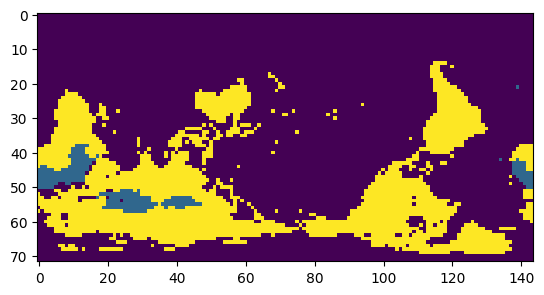

In [33]:
plt.imshow(source[2,::5,::5])

In [32]:
##  Batched data filing with nearest neighbor interpolation
##  (multiple-layer (gridcell) variables)
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import os
from pathlib import Path

save = 1
list = 0

numurbl = 3 ;
nlevurb = 5 ;
numrad = 2 ;
nlevsoi = 10 ;
natpft = 17 ;

time = 12
nchar = 256 ;
lsmpft = 17 ;

#  ===========non-urban variables (multiple layers) =============
# nearest neighbor:"double" variables (nlevsoi/natpft, gridcell)
Variable_double_2D = ['ORGANIC','PCT_CLAY', 'PCT_SAND', 'PCT_NAT_PFT']

#  ===========urban variables ===================================
# nearest neighbor:"int" variables (gridcell)
Variable_urban_int_1D = ['URBAN_REGION_ID']

# nearest neighbor:"int" variables (numurbl, gridcell)
Variable_urban_int_2D = ['NLEV_IMPROAD' ]

# nearest neighbor:"double" variables (numurbl, gridcell)
Variable_urban_double_2D = ['T_BUILDING_MAX', 'T_BUILDING_MIN',
        'WIND_HGT_CANYON','WTLUNIT_ROOF','WTROAD_PERV','THICK_ROOF',
        'THICK_WALL','PCT_URBAN','HT_ROOF','EM_IMPROAD','EM_PERROAD',
        'EM_ROOF','EM_WALL','CANYON_HWR']

# nearest neighbor:"double" variables (nlevurb, numurbl, gridcell)
Variable_urban_double_3D_nlev = ['TK_IMPROAD','TK_ROOF','TK_WALL', 
                                 'CV_IMPROAD', 'CV_ROOF', 'CV_WALL']

# nearest neighbor:"double" variables (numrad, numurbl, gridcell)
Variable_urban_double_3D_nrad = ['ALB_IMPROAD_DIF','ALB_IMPROAD_DIR','ALB_PERROAD_DIF',
        'ALB_PERROAD_DIR','ALB_ROOF_DIF', 'ALB_ROOF_DIR',
        'ALB_WALL_DIF', 'ALB_WALL_DIR']

Method_list = ['nearest', 'linear', 'cubic', 'gk']
Dimension_list = ['gridcell', 'nlevsoi', 'natpft',
                  'numburbl', 'ulevurb', 'numrad' ]

'''
===== multiple layers variable (non-urban, nearest neighbor) ====
double     ORGANIC(nlevsoi, gridcell)
double    PCT_CLAY(nlevsoi, gridcell)
double    PCT_SAND(nlevsoi, gridcell)

double PCT_NAT_PFT(natpft, gridcell) 


====== urban variables (nearest neighbor) ====

int    URBAN_REGION_ID(gridcell)

int       NLEV_IMPROAD(numurbl, gridcell) 

double  T_BUILDING_MAX(numurbl, gridcell) "
double  T_BUILDING_MIN(numurbl, gridcell) "
double WIND_HGT_CANYON(numurbl, gridcell) 
double    WTLUNIT_ROOF(numurbl, gridcell) "
double     WTROAD_PERV(numurbl, gridcell) "
double      THICK_ROOF(numurbl, gridcell) "
double      THICK_WALL(numurbl, gridcell) "
double       PCT_URBAN(numurbl, gridcell) 
double         HT_ROOF(numurbl, gridcell) 
double      EM_IMPROAD(numurbl, gridcell) "
double      EM_PERROAD(numurbl, gridcell) "
double         EM_ROOF(numurbl, gridcell) "
double         EM_WALL(numurbl, gridcell) "
double      CANYON_HWR(numurbl, gridcell)

double      TK_IMPROAD(nlevurb, numurbl, gridcell) "
double         TK_ROOF(nlevurb, numurbl, gridcell) "
double         TK_WALL(nlevurb, numurbl, gridcell) "
double      CV_IMPROAD(nlevurb, numurbl, gridcell) "
double         CV_ROOF(nlevurb, numurbl, gridcell) "
double         CV_WALL(nlevurb, numurbl, gridcell) "

double ALB_IMPROAD_DIF(numrad, numurbl, gridcell) 
double ALB_IMPROAD_DIR(numrad, numurbl, gridcell) "
double ALB_PERROAD_DIF(numrad, numurbl, gridcell) "
double ALB_PERROAD_DIR(numrad, numurbl, gridcell) "
double    ALB_ROOF_DIF(numrad, numurbl, gridcell) "
double    ALB_ROOF_DIR(numrad, numurbl, gridcell) "
double    ALB_WALL_DIF(numrad, numurbl, gridcell) "
double    ALB_WALL_DIR(numrad, numurbl, gridcell) "
'''

iMethod = Method_list[0]  # 0 nearest

if list == 0:
    tag = "double_nlsoi_natpft_y_x"
    iVariable_list = Variable_double_2D 

# int variable with nearest neighbor method
if list== 1: 
    tag = "urban_int_y_x"
    iVariable_list = Variable_urban_int_1D 

# int variable with nearest neighbor method (numurbl, gridcell))
if list == 2:
    tag = "urban_int_numurbl_y_x"
    iVariable_list = Variable_urban_int_2D
    
if list == 3:
    tag = "urban_double_numurbl_y_x"
    iVariable_list = Variable_urban_double_2D

if list == 4:
    tag = "urban_double_nlevurb_numurbl_y_x"
    iVariable_list = Variable_urban_double_3D_nlev
    
if list == 5:
    tag = "urban_double_numrad_numurbl_y_x"
    iVariable_list = Variable_urban_double_3D_nrad 
    
Points_in_land = "DataConversion_info/original_points_index.csv"
outputfile = 'surface_properities_1kmx1km_'+tag+'.nc'

if Path(outputfile).exists():
    os.remove(outputfile)
if save:
    # Open a new NetCDF file to write the data to. For format, you can choose from
    # 'NETCDF3_CLASSIC', 'NETCDF3_64BIT', 'NETCDF4_CLASSIC', and 'NETCDF4'
    w_nc_fid = nc.Dataset(outputfile, 'w', format='NETCDF4')
    w_nc_fid.title = 'The 1kmx1km surface propertties derived from a 0.5 degree global dataset'

    # create the dimension variable
    x_dim = w_nc_fid.createDimension('x_dim', len(x_coor))
    y_dim = w_nc_fid.createDimension('y_dim', len(y_coor))
    nlevsoi_dim = w_nc_fid.createDimension('nlevsoi', nlevsoi)
    natpft_dim = w_nc_fid.createDimension('natpft', natpft)    
    urb_dim = w_nc_fid.createDimension('numurbl', numurbl)
    nlurb_dim = w_nc_fid.createDimension('nlevurb', nlevurb)
    nrad_dim = w_nc_fid.createDimension('numrad', numrad)
    time_dim = w_nc_fid.createDimension('time_dim', None)

# get the fine resolution data and the locations (lat, lon)
r_daymet = nc.Dataset('Daymet_FSDS.nc', 'r', format='NETCDF4')
x_coor = r_daymet.variables['x'][:]  # 1D x-axis
y_coor = r_daymet.variables['y'][:]  # 1D y-axis
FSDS = r_daymet.variables['FSDS'][0,:,:]

mask_d = np.where(~np.isnan(FSDS), 1, 0)
data = np.zeros((len(y_coor),len(x_coor)), dtype=iVariable_type)
f_data = np.ma.array(data, mask=mask_d)
grid_x, grid_y = np.meshgrid(x_coor,y_coor)
grid_y1 = grid_y[f_data.mask]
grid_x1 = grid_x[f_data.mask]
f_data1 = f_data[f_data.mask]

print("single layer grid is ready")

# read in the points within daymet land mask
df= pd.read_csv(Points_in_land, header=0)
points_in_daymet_land = df.values.tolist()

# prepare the data source with points_in_daymet_land

land_points = len(points_in_daymet_land)
points=np.zeros((land_points, 2), dtype='double')
o_data=np.zeros(land_points, dtype='double')
for i in range(land_points):
    # points = [y,x]
    points[i,0] = points_in_daymet_land[i][1]
    points[i,1] = points_in_daymet_land[i][0]

print ('location of data points is ready')

# read in the source data
r_surf = nc.Dataset('surfdata.nc', 'r', format='NETCDF4')

for v in range(len(iVariable_list)):
    source = r_surf.variables[iVariable_list[v]][:]    
    if (len(source.shape) == 2):
        layer = 1
        out_layer = 1
        iVariable_type = source[0,0].dtype
        all_data = np.zeros((len(y_coor),len(x_coor)), dtype=iVariable_type)

    if (len(source.shape) == 3):
        layer = source.shape[0]  #(3, 360, 720)
        out_layer = 1
        iVariable_type = source[0,0,0].dtype
        all_data = np.zeros((layer, len(y_coor),len(x_coor)), dtype=iVariable_type)

    if (len(source.shape) == 4):
        layer = source.shape[1]  #(5, 3, 360, 720)
        out_layer = source.shape[0]
        iVariable_type = source[0,0,0,0].dtype
        all_data = np.zeros((out_layer, layer, len(y_coor),len(x_coor)), dtype=iVariable_type)

    for ol in range(out_layer):    
        for l in range(layer):  
            for i in range(land_points):
                # source is in [lat, lon] format
                if (len(source.shape) == 2):
                    o_data[i] = source[int(points_in_daymet_land[i][4]),int(points_in_daymet_land[i][5])]
                if (len(source.shape) == 3):                
                    o_data[i] = source[l, int(points_in_daymet_land[i][4]),int(points_in_daymet_land[i][5])]
                if (len(source.shape) == 4):  
                    o_data[i] = source[ol, l, int(points_in_daymet_land[i][4]),int(points_in_daymet_land[i][5])]
                    
            f_data1 = griddata(points, o_data, (grid_y1, grid_x1), method=iMethod)
            # put the masked data back to the data (with the daymet land mask)
            f_data = np.ma.array(data, mask=mask_d)
            f_data[f_data.mask]=f_data1
            
            if (len(source.shape) == 2):
                all_data = f_data
            if (len(source.shape) == 3):
                all_data[l,:,:] = f_data
            if (len(source.shape) == 4):
                all_data[ol, l,:,:] = f_data                
            print(str(l) + " layer is ready")
            
    if save:
        
        if (len(source.shape) == 2):
            w_nc_var = w_nc_fid.createVariable(iVariable_list[v], iVariable_type, 
                                   ('y_dim', 'x_dim'))       
        if (len(source.shape) == 3):
            if (source.shape[0] == numurbl):
                w_nc_var = w_nc_fid.createVariable(iVariable_list[v], iVariable_type, 
                                   ('numurbl', 'y_dim', 'x_dim'))
            if (source.shape[0] == nlevsoi):                
                w_nc_var = w_nc_fid.createVariable(iVariable_list[v], iVariable_type, 
                                   ('nlevsoi', 'y_dim', 'x_dim'))   
            if (source.shape[0] == natpft):                
                w_nc_var = w_nc_fid.createVariable(iVariable_list[v], iVariable_type, 
                                   ('natpft', 'y_dim', 'x_dim'))                 
        if (len(source.shape) == 4):
            if (source.shape[0] == nlevurb):  
                w_nc_var = w_nc_fid.createVariable(iVariable_list[v], iVariable_type, 
                                   ('nlevurb', 'numurbl', 'y_dim', 'x_dim'))   
            if (source.shape[0] == numrad):  
                w_nc_var = w_nc_fid.createVariable(iVariable_list[v], iVariable_type, 
                                   ('numrad', 'numurbl', 'y_dim', 'x_dim'))   
              
        w_nc_var.long_name = iVariable_list[v]    
        w_nc_fid.variables[iVariable_list[v]][:] = all_data
        print(" Variable: "+ iVariable_list[v] + " is done")

if save:
    w_nc_fid.close()  # close the new file

#plt.imshow(all_data[0,::5,::5])

single layer grid is ready
location of data points is ready
0 layer is ready
1 layer is ready
2 layer is ready
3 layer is ready
4 layer is ready
5 layer is ready
6 layer is ready
7 layer is ready
8 layer is ready
9 layer is ready
 Variable: ORGANIC is done
0 layer is ready
1 layer is ready
2 layer is ready
3 layer is ready
4 layer is ready
5 layer is ready
6 layer is ready
7 layer is ready
8 layer is ready
9 layer is ready
 Variable: PCT_CLAY is done
0 layer is ready
1 layer is ready
2 layer is ready
3 layer is ready
4 layer is ready
5 layer is ready
6 layer is ready
7 layer is ready
8 layer is ready
9 layer is ready
 Variable: PCT_SAND is done
0 layer is ready
1 layer is ready
2 layer is ready
3 layer is ready
4 layer is ready
5 layer is ready
6 layer is ready
7 layer is ready
8 layer is ready
9 layer is ready
10 layer is ready
11 layer is ready
12 layer is ready
13 layer is ready
14 layer is ready
15 layer is ready
16 layer is ready
 Variable: PCT_NAT_PFT is done


In [30]:
source[0,0,0,0].dtype

dtype('float64')